In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
import random
%autosave 190

Autosaving every 190 seconds


In [35]:
#all library needed for CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG19, DenseNet201, DenseNet121
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GroupShuffleSplit

In [50]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


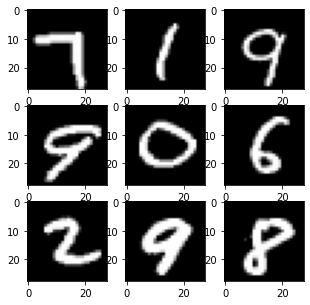

In [59]:
def exampleplot(pic):
    random.seed(99)
    n = 0
    randomlist = random.sample(range(0, df.shape[0]), 9)
    fig, axm = plt.subplots(nrows=3, ncols=3, figsize=(5, 5))
    for axs in (axm):
        for ax in (axs):
#             idx = i * 5 + j
            ax.imshow(pic[randomlist[n]], cmap='gray')

            n += 1

    plt.show()

sample = df.iloc[:, 1:].values.reshape(-1, 28, 28)        
exampleplot(sample)

In [38]:
df.values.shape

(42000, 785)

### Prepare data

In [39]:
img = df.iloc[:, 1:].values.reshape((df.values.shape[0], 28, 28, 1))
img = img/255.0
img.shape

(42000, 28, 28, 1)

In [40]:
label = to_categorical(df.iloc[:, 0].values)
label.shape

(42000, 10)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(img, label, train_size=0.9)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

### Start tranning


In [42]:
model = tf.keras.models.Sequential([    


        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
#         tf.keras.layers.Flatten(input_shape = (28, 28)),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Dropout(0.20),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),


    
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(10, activation='softmax')
    
    
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
#               loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 6, 6, 128)        

In [44]:
data_train = ImageDataGenerator(
    rotation_range = 8,
    zoom_range=0.1
)
train_gen = data_train.flow(X_train, y_train, batch_size = 64, shuffle = True)

In [45]:
# history = model.fit(train_gen, epochs=20, validation_data=(X_test, y_test))
history = model.fit(train_gen, epochs=55, validation_data=(X_test, y_test))

Epoch 1/55
591/591 [==============================] - 7s 10ms/step - loss: 0.3102 - accuracy: 0.9013 - val_loss: 0.0725 - val_accuracy: 0.9748
Epoch 2/55
591/591 [==============================] - 6s 10ms/step - loss: 0.1043 - accuracy: 0.9673 - val_loss: 0.0486 - val_accuracy: 0.9843
Epoch 3/55
591/591 [==============================] - 6s 10ms/step - loss: 0.0773 - accuracy: 0.9753 - val_loss: 0.0385 - val_accuracy: 0.9855
Epoch 4/55
591/591 [==============================] - 6s 10ms/step - loss: 0.0651 - accuracy: 0.9796 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 5/55
591/591 [==============================] - 6s 10ms/step - loss: 0.0574 - accuracy: 0.9820 - val_loss: 0.0424 - val_accuracy: 0.9860
Epoch 6/55
591/591 [==============================] - 6s 11ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0462 - val_accuracy: 0.9871
Epoch 7/55
591/591 [==============================] - 7s 11ms/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0301 - val_accuracy: 0.9893

### loard result

In [46]:
def plot_history(history):    
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc)
    plt.plot(x, val_acc)
    plt.title('Accuracy vs. No. of epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(x, loss)
    plt.plot(x, val_loss)
    plt.title('Loss vs. No. of epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    plt.show()

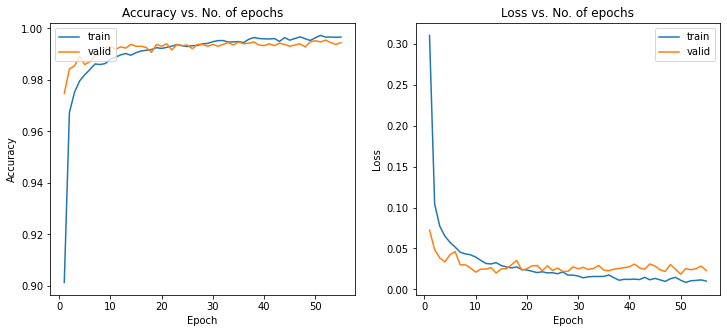

In [47]:
plot_history(history)

In [48]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: {:.5f}'.format(results[0]))
print('Test Accuracy: {:.2f}%'.format(results[1] * 100))

Test Loss: 0.02311
Test Accuracy: 99.45%


In [29]:
# model.save("Digit_Recongnizer_model1_temp4_rotate.h5")

In [18]:
# m1 = tf.keras.models.load_model("Digit_Recongnizer_model1_temp1.h5")

### Predict

In [19]:
df = pd.read_csv("test.csv")

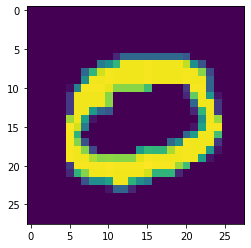

In [20]:
plt.imshow(df.iloc[1, :].values.reshape((28,28)))

In [21]:
pre = df.iloc[:,:].values.reshape((df.values.shape[0], 28, 28, 1))
pre = pre/255.0

In [22]:
result = model.predict(pre)

In [23]:
digit = np.argmax(result)

In [24]:
print(digit)

2


In [25]:
ImageId = list()
Label = list()
for i in range(result.shape[0]):
    ImageId.append(i + 1)
    Label.append(np.argmax(result[i]))

In [27]:
dic = dict()
dic["ImageId"] = ImageId
dic["Label"] = Label
output = pd.DataFrame(dic)

In [28]:
output.to_csv("submission4.csv")